In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import os
os.getcwd()

'C:\\Users\\sanghyun\\Desktop\\Fst_week_demo\\team2_wanted_onboarding_2nd\\Week1_정상현'

## <U> 유니콘 기업의 정의 </U>  
### 기업가치가 10억 달러 이상인 비상장 스타트업을 이르는 말 (출처 : 나무위키)
### 인터넷을 검색하다보면 매출은 얼마 안되는 반면, 가치가 수천 억에 달하는 스타트업들을 종종 볼 수 있다. 
### 기업 가치는 매출만으로 정해지지 않기 때문이다. 
### 오히려 매출과 수익이 안정적으로 발생하는 기업이라면투자를 받을 이유가 덜할 것이다. 
### 기업 가치 평가는 시장규모와 시장점유율, 현금 유동성, 기술 혁신성, 대표의 야망 등을
### 종합적으로 고려하여 진행된다. 따라서 언제든지 아래 기업들의 순위가 뒤바뀔 가능성이 크다.

In [73]:
df1=pd.read_csv('company_nps_data.csv',encoding='euc-kr')

In [70]:
df1.loc[,:]

,회사ID,연매출액,year,month,월별_연금보험료,월별_직원수,월별_매출액,day,date,임금


In [75]:
df1.loc[df1.연매출액<0.1,:]

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
7516,432911,-7882176,2017,5,2042620,6
7617,432911,-7882176,2017,10,1687760,5
8595,432911,-7882176,2017,1,2042620,6
23150,432911,-7882176,2017,7,2091860,6
36048,432911,-7882176,2017,2,2042620,6
37489,432911,-7882176,2017,11,1687760,5
51605,432911,-7882176,2017,6,2042620,6
56276,432911,-7882176,2017,4,2042620,6
64094,432911,-7882176,2017,3,2042620,6
67889,432911,-7882176,2017,12,1687760,5


## <U>*진행방향*</U>
### <U>Route1</U>
### cb insight에서 유니콘 기업이라고 발표한 기업들의 연간매출성장률의 평균을 사람인에서 얻었습니다. 그리고 그 기준으로 주어진 데이터의 년별 매출성장률을 필터링하여 유니콘기업의 매출성장률 평균의 기준에 해당되는 업체를 선별했습니다. 


### <U>Route2</U> 
### iforest모델로 이상값을 구하고 (1) 직원별 매출액과 (2) 보험료1원당 매출액(효율적인 임금세팅)의 상위 0.01%에 해당
### 하는 그룹 중 outlier에 해당하는 기업들을 유니콘 기업이라고 판단했습니다.
### 그리고 위 두 기준에 모두 해당하는 기업을 최종적으로 유니콘기업이라고 판단하였습니다.  
###  

## <U>논리는 다음과 같습니다</U>
### 실제 유니콘 기업의 연간매출성장률과 부합하고, 해당 매출액이 비교적 직원당 높은 효율을 바탕으로 이루어졌다.
### 그리고, 임금과 연동된 보험료당 높은 매출액을 얻는것으로 보아 효율적인 임금구조
### (고임금의 매출액상승에 기여하지 않는 높은 호봉 관리자가 없음)를 가지고 있다.
### 마지막으로, 5천개중에 5개정도의 유니콘을 찾으라는 과제이므로 일반적인 기업과 다른 예외적인 기업이 될 것이기에
### 스케일조정이나 인코딩의 영향을 덜 받는 iforest를 사용하였습니다.


In [14]:
# null값 없음
df1.isnull().sum()

회사ID        0
연매출액        0
년도          0
월           0
월별_연금보험료    0
월별_직원수      0
dtype: int64

월별직원수의 편차가 크고 년도가 2015년부터 2019년까지로 년도 컬럼이 구성됨

In [15]:
df1.describe()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
count,9.980100e+04,9.980100e+04,99801.000000,99801.000000,9.980100e+04,99801.000000
mean,2.762982e+05,3.053589e+07,2016.967125,6.714352,9.734079e+06,37.623431
std,1.339032e+05,3.016647e+08,0.976688,3.512966,4.347256e+07,146.947194
min,6.300000e+01,-7.882176e+06,2015.000000,1.000000,0.000000e+00,0.000000
25%,1.655300e+05,1.409760e+06,2016.000000,4.000000,1.181160e+06,6.000000
50%,2.591490e+05,3.573585e+06,2017.000000,7.000000,2.332760e+06,11.000000
75%,3.826560e+05,9.582321e+06,2018.000000,10.000000,5.591860e+06,24.000000
max,5.159723e+06,1.132878e+10,2019.000000,12.000000,9.780673e+08,3133.000000


### 과제 : 5천개 회사중에 유니콘 찾기 - 최소 5개
* 변수는 1.매출액, 2.보혐료, 3.직원수, 4.날짜 

In [16]:
len(df1.회사ID.unique())

5000

* 연매출액은 연단위이므로, 다른 변수와 맞추고 향후 aggregation계산의 편의를 위해 12로 나눠서 월매출 변수도 생성함

In [17]:
df1['월별_매출액']=(df1.연매출액)/12
df1

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,월별_매출액
0,233757,41688077,2018,7,8912380,36,3.474006e+06
1,123464,1760695,2018,3,942380,5,1.467246e+05
2,342124,3221341,2018,7,781180,4,2.684451e+05
3,386420,4815584,2015,11,3795900,14,4.012987e+05
4,129243,9799736,2018,10,40724680,151,8.166447e+05
...,...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11,3.858852e+05
99797,239388,1045021,2018,10,1428800,9,8.708508e+04
99798,272304,181898,2018,3,392560,4,1.515817e+04
99799,362194,2100218,2018,12,874780,3,1.750182e+05


* 년도별 데이터가 2016년과 2018년에 제일 많고, 그에 비해19년, 15년은 상당히 적음  
* 월데이터까지 포함하여 라인차트로 시각화해서 볼 필요가 있음

In [18]:
df1.년도.value_counts().sort_index()

2015     3586
2016    37685
2017    17806
2018    39872
2019      852
Name: 년도, dtype: int64

In [19]:
# 일 데이터가 없기 때문에 임의로 1로 추가함
df1['일'] = 1

In [20]:
df1.columns

Index(['회사ID', '연매출액', '년도', '월', '월별_연금보험료', '월별_직원수', '월별_매출액', '일'], dtype='object')

In [21]:
df1.columns=['회사ID', '연매출액', 'year', 'month', '월별_연금보험료', '월별_직원수','월별_매출액','day']

In [22]:
# 날짜타입변환
df1['date']=pd.to_datetime(df1[['year','month','day']])
df1

,회사ID,연매출액,year,month,월별_연금보험료,월별_직원수,월별_매출액,day,date
0,233757,41688077,2018,7,8912380,36,3.474006e+06,1,2018-07-01
1,123464,1760695,2018,3,942380,5,1.467246e+05,1,2018-03-01
2,342124,3221341,2018,7,781180,4,2.684451e+05,1,2018-07-01
3,386420,4815584,2015,11,3795900,14,4.012987e+05,1,2015-11-01
4,129243,9799736,2018,10,40724680,151,8.166447e+05,1,2018-10-01
...,...,...,...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11,3.858852e+05,1,2017-02-01
99797,239388,1045021,2018,10,1428800,9,8.708508e+04,1,2018-10-01
99798,272304,181898,2018,3,392560,4,1.515817e+04,1,2018-03-01
99799,362194,2100218,2018,12,874780,3,1.750182e+05,1,2018-12-01


* 월 데이터까지 합쳐서 날짜데이터를 시각화해서 본 결과로 년도별추이가 있고 월별추이는 크지 않은 것으로 판단됨
* 결과는 앞서 언급한 것처럼 2016년과 2018년에 3000건 이상이며 2017년은 절반수준, 2019년은 비교가 안될정도로 적음

### 규정
*국민연금보험료는 기준월소득액 * 0.09로 계산하며,*  
*최저 33만원에서 최고금액은 524만원까지의 범위로 결정하게 됨*  
*따라서, 신고한 소득월액이 33만원보다 적으면 33만원을 기준소득월액으로 하고,*  
*524만원보다 많으면 524만원을 기준소득월액으로 함*  

* 보험료를 직원수로 나눠서 월별 직원별 보험료(기준월소득액과 연동되는 변수로 추정함-임금과 연동되는 변수)*    
* 라는 변수를 만들었고 이를 시각화 함*  
* 시간이 지나면서 직원들에게 지급되는 보험료는 등락이 있지만, 증가하는 추세를 보임*  
* 상반기에는 낮고 하반기에 증가하는 경향을 보임*  
* 2018년에 회사의 수는 제일 많지만, 2017년에 비해 직원별 보험료가 낮아짐(회사의 수가 늘어나서 해당 결과가 발생한 것으로 추정)*  
* 그리고, 2019년에는 회사수가 제일 적지만 월별 직원별 보험료가 제일 높음(임금이 높은 기업이 많은것이 아닐까 추정함)*  

In [23]:
#  규정에서 처럼 1인당 연금보험료는 임금과 연동되는 수치이고, 임금은 1안당연금보험료/0.09로 추정이 가능함
월별_직원별보험료=df1.월별_연금보험료/df1.월별_직원수
df1['임금']=월별_직원별보험료/0.09
df1

,회사ID,연매출액,year,month,월별_연금보험료,월별_직원수,월별_매출액,day,date,임금
0,233757,41688077,2018,7,8912380,36,3.474006e+06,1,2018-07-01,2.750735e+06
1,123464,1760695,2018,3,942380,5,1.467246e+05,1,2018-03-01,2.094178e+06
2,342124,3221341,2018,7,781180,4,2.684451e+05,1,2018-07-01,2.169944e+06
3,386420,4815584,2015,11,3795900,14,4.012987e+05,1,2015-11-01,3.012619e+06
4,129243,9799736,2018,10,40724680,151,8.166447e+05,1,2018-10-01,2.996665e+06
...,...,...,...,...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11,3.858852e+05,1,2017-02-01,2.427010e+06
99797,239388,1045021,2018,10,1428800,9,8.708508e+04,1,2018-10-01,1.763951e+06
99798,272304,181898,2018,3,392560,4,1.515817e+04,1,2018-03-01,1.090444e+06
99799,362194,2100218,2018,12,874780,3,1.750182e+05,1,2018-12-01,3.239926e+06


* 임금으로 만든 변수의 최소값을 보면 33만원을 최소기준 월소득액으로 한다는것에 비해 29만원이라 훨씬 낮다  


* 또한, 최대값도 533만원으로, 524만원보다 많기 때문에 524만원으로 한다는 규정에 맞지 않는다.

* 그러나, 우리가 비교할 유니콘 기업의 데이터도 실제 데이터가 아닌 연금보험에서 머신러닝으로 추정한 데이터라고 하므로,

* 크게 차이가 나지 않아 이를 사용한다.


In [24]:
df1['임금'].describe()

count    9.978800e+04
mean     2.472694e+06
std      7.150588e+05
min      2.900000e+05
25%      1.962540e+06
50%      2.479963e+06
75%      2.963583e+06
max      5.331347e+06
Name: 임금, dtype: float64

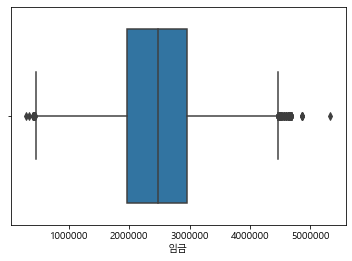

In [28]:
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.boxplot(df1['임금'])

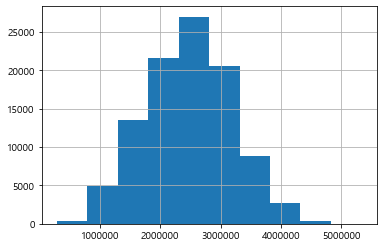

In [29]:
# 임금(직원별 보험료)는 정규분포형태의 형태와 유사함
df1.임금.hist()

*  직원별 보험료값(임금과 연동되는)은 최저 2만6천100원인데, 실제 규정된 보험료 최저값은 인당 33만원에 해당됨  
*  이는 최고값의 경우도 동일하게 524만원에 비해 훨씬 낮은 47만9821원으로, 데이터에서 0한자리수가 생략되었을 수도 있음

*  년월별 연금보험료는 2015년부터 19년까지는 전반적으로 증가하는 추세에 있으며  
*  상반기보다는 하반기에 증가하는 경향을 보임  
*  2016년과 2018년에 데이터가 타 년도에 비해 많았으나, 직원별보험료의 중앙값은 오히려 17년이나 19년보다 낮음

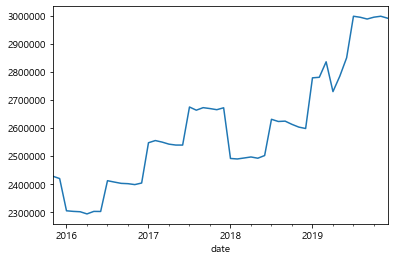

In [30]:
df1_pay_date=df1.groupby('date')['임금'].median()
df1_pay_date.plot()

## Route 1 : 매출성장률 기반 실제 유니콘기업의 최소 3개년 평균 매출액 성장률 이상의 
##                  기업 필터링하기

In [31]:
demo =df1.groupby(['회사ID','year'])['월별_매출액'].sum()
demo

회사ID     year
63       2018    1.132878e+10
95       2018    6.569474e+08
102      2018    4.951060e+08
295      2018    5.585113e+07
414      2018    1.973277e+07
                     ...     
2400284  2018    7.369868e+05
2437574  2018    1.783467e+04
2693684  2019    1.190380e+05
3312354  2019    6.048179e+05
5159723  2019    2.159915e+05
Name: 월별_매출액, Length: 10111, dtype: float64

### 회사별 경영년도 구하기
*  거의 절반의 회사(2411개)들이 1년차이고, 실제 유니콘 기업의 매출액과 비교하기 위해 최소 3년이상의 데이터가 있는 회사들만 선택함  
*  실제 유니콘들의 매출 데이터도 사람인에서 3년치만  있는 경우가 대부분이어서 이렇게 년차로 선택함

In [32]:
# no가 없고 대표적인 매출액 데이터로 카운트해서 회사당 데이터내 근속년수를 구함
demo2=demo.reset_index().groupby('회사ID')['월별_매출액'].count()
demo2.sort_values(ascending=False)

회사ID
155754    5
404192    5
250472    5
296819    5
442467    5
         ..
308221    1
308198    1
308130    1
307873    1
63        1
Name: 월별_매출액, Length: 5000, dtype: int64

In [33]:
demo2.value_counts().sort_index()

1    2411
2     944
3     783
4     847
5      15
Name: 월별_매출액, dtype: int64

In [34]:
demo2_1=demo2[demo2>2].reset_index()
demo2_1.회사ID.unique()

array([ 14271,  59533, 122968, ..., 514934, 515264, 516653], dtype=int64)

In [42]:
# 다른 팀원 분의 아이디어를 바탕으로 2019년(가장최근)까지 유지되고 있는 기업만 필터링함
cop2019=df1.loc[df1.year==2019,:].회사ID.unique()

In [53]:
demo2_1=demo2_1.loc[demo2_1['회사ID'].isin(cop2019),:]

In [54]:
# 1645개의 기업이 데이터상 3년차 이상인 기업임.
hy_comp= demo2_1.회사ID.unique()
len(hy_comp)

42

In [55]:
# 3년차 이상의 기업의 데이터
df_hycomp=df1.loc[df1.회사ID.isin(hy_comp),:]
df_hycomp

,회사ID,연매출액,year,month,월별_연금보험료,월별_직원수,월별_매출액,day,date,임금
35,395238,3948832,2019,10,5308140,25,3.290693e+05,1,2019-10-01,2.359173e+06
41,442467,17003119,2018,4,7862060,37,1.416927e+06,1,2018-04-01,2.360979e+06
52,192812,10353415,2019,7,5480520,17,8.627846e+05,1,2019-07-01,3.582039e+06
75,473265,2111857,2016,4,3998040,29,1.759881e+05,1,2016-04-01,1.531816e+06
178,280967,440704,2018,8,410400,3,3.672533e+04,1,2018-08-01,1.520000e+06
...,...,...,...,...,...,...,...,...,...,...
99599,420165,93111515,2017,11,64414060,177,7.759293e+06,1,2017-11-01,4.043569e+06
99728,130023,41902353,2016,2,24408120,111,3.491863e+06,1,2016-02-01,2.443255e+06
99734,192812,19522154,2016,7,958480,3,1.626846e+06,1,2016-07-01,3.549926e+06
99757,128174,106106973,2017,2,51496520,192,8.842248e+06,1,2017-02-01,2.980123e+06


In [58]:
df_f_y_sal=df_hycomp.sort_values(['회사ID','date']).groupby(['회사ID','year'])[['월별_매출액','임금']].sum()
df_f_y_sal=df_f_y_sal.reset_index()

In [59]:
df_f_y_sal.columns=['회사ID','year','매출액','임금']
df_f_y_sal

,회사ID,year,매출액,임금
0,14271,2015,1.999158e+05,5.233952e+06
1,14271,2016,4.257715e+06,3.283502e+07
2,14271,2017,5.005248e+06,2.910838e+07
3,14271,2018,8.388401e+06,2.802786e+07
4,14271,2019,9.039340e+06,2.851103e+07
...,...,...,...,...
169,478922,2018,1.391117e+06,1.929505e+07
170,478922,2019,1.746665e+06,2.192429e+07
171,510449,2016,2.445016e+07,2.489451e+07
172,510449,2017,2.515407e+07,2.568617e+07


In [90]:
g_sal=[]
df_f_id=df_f_y_sal.loc[:,'회사ID']
df_f_sal=df_f_y_sal.loc[:,'매출액']

In [91]:
# 같은 회사ID에서 매출성장률 측정
a1=[]
for i in np.arange(df_f_y_sal.shape[0]):
    if (df_f_id.values[i] == df_f_id.values[i-1]):
        a1.append((df_f_sal[i] - df_f_sal[i-1])/df_f_sal[i-1]*100)
    else :
        a1.append(0)
        
a1

[0,
 2029.753771378789,
 17.557140391031314,
 67.59211531576459,
 7.759989061085625,
 0,
 540.2395431013231,
 -40.17240881393133,
 16.343655218465152,
 0,
 330.7114532081287,
 22.85740060797391,
 -4.495604026483594,
 0,
 403.5535884946624,
 -53.3275584464595,
 0,
 -1.8661039452091563,
 -9.601847996948925,
 0,
 4.794674531309825,
 -5.957800175741497,
 0,
 497.8821958969738,
 2.6060373182095473,
 -4.002807477109592,
 0,
 417.04195062717247,
 -15.311599732920058,
 0,
 -11.104593750168606,
 6.878303345366531,
 0,
 27.214047243838657,
 -20.325134791058893,
 0,
 261.40211878187336,
 406.8039154680133,
 0,
 -20.319808008011957,
 -0.9633189498441499,
 0,
 745.1787845276253,
 2.7181101384307493,
 0,
 282.2106184450609,
 -22.62819617158027,
 27.779533483822423,
 0,
 108.40550620726923,
 -22.03788378652653,
 0,
 738.4692639486346,
 46.12184817512993,
 -82.88902471961221,
 0,
 895.2021958960381,
 36.60059988737743,
 -13.959833929014595,
 0,
 -16.03464360312181,
 83.97228886432863,
 0,
 461.4658830

In [92]:
len(a1)

5812

In [93]:
df_f_y_sal.shape

(5812, 3)

In [94]:
df_f_y_sal['매출액성장률']=a1
df_f_y_sal

,회사ID,year,매출액,매출액성장률
0,14271.0,2015.0,1.999158e+05,0.000000
1,14271.0,2016.0,4.257715e+06,2029.753771
2,14271.0,2017.0,5.005248e+06,17.557140
3,14271.0,2018.0,8.388401e+06,67.592115
4,14271.0,2019.0,9.039340e+06,7.759989
...,...,...,...,...
5807,515264.0,2017.0,2.074820e+06,39.313150
5808,515264.0,2018.0,2.422405e+06,16.752538
5809,516653.0,2016.0,1.745520e+06,0.000000
5810,516653.0,2017.0,1.956460e+06,12.084651


*  아래는 따로 가진 cb인사이트 기준으로 선정된 유니콘 기업의 매출액 데이터를 사람인에서 가져옴

*  절대적인 매출액 수치는 의미가 없으므로, 매출액 성장률을 살펴보는 것이 의미가 있을 것으로 추정함

In [95]:
uni_data=pd.read_csv('유니콘기업매출액.csv',encoding='euc-kr')
uni_data

,년도,기업명,매출액,성장률,평균성장률
0,2015,쿠팡,1133700000000,NaN,NaN
1,2016,쿠팡,1915900000000,68.995325,NaN
2,2017,쿠팡,2684600000000,40.122136,NaN
3,2018,쿠팡,4435400000000,65.216420,NaN
4,2019,쿠팡,7153000000000,61.270686,NaN
5,2020,쿠팡,13300000000000,85.935971,64.308107
6,2018,크래프톤,20000000000,NaN,NaN
7,2019,크래프톤,12000000000,-40.000000,NaN
8,2020,크래프톤,95000000000,691.666667,325.833333
9,2017,바비리퍼블리카,20591080000,NaN,NaN


In [96]:
# 유니콘업체들의 평균 매출 성장률
given_rate=uni_data.평균성장률.mean()
given_rate

167.39313336611113

### cb 인사이트에 뽑힌 유니콘 기업의 평균 매출 성장률보다 큰 매출성장률을 가진 기업들을 필터링
### 해당 기업들을 f_id_demo에 별도로 저장

In [97]:
df_demo=df_f_y_sal.loc[df_f_y_sal['매출액성장률']>given_rate,:]
f_id_demo=df_demo.회사ID.unique()
len(f_id_demo)

1335

## Route 2: IsolationFroest를 기반으로 추출한 outliers와 매출액을 직원별, 보험료별로 조정한  
##                변수로 추정한 상위 0.01%에 해당하는 기업에 공통으로 해당되는 기업들을 
##                유니콘기업으로 보는 방식으로 기업 목록을 추출함

In [36]:
# 월별_직원수는 -값이 없는 것으로 보아 올바른 데이터임
df1.월별_직원수.describe()

count    99801.000000
mean        37.623431
std        146.947194
min          0.000000
25%          6.000000
50%         11.000000
75%         24.000000
max       3133.000000
Name: 월별_직원수, dtype: float64

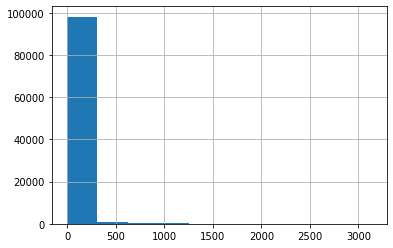

In [37]:
df1.월별_직원수.hist()

### 매출액을 직원수로 나눠서 직원이 기여하는 매출액을 추정한다
### 매출액을 연금보험료로 나눠서 기업이 지급하는 임금이 매출액에 얼마나 기여하는지 추정한다.

In [13]:
df1['월별직원별매출액']=df1.월별_매출액/df1.월별_직원수
df1

,회사ID,연매출액,year,month,월별_연금보험료,월별_직원수,월별_매출액,day,date,월별_직원별보험료,월별직원별매출액
0,233757,41688077,2018,7,8912380,36,3.474006e+06,1,2018-07-01,247566.111111,96500.178241
1,123464,1760695,2018,3,942380,5,1.467246e+05,1,2018-03-01,188476.000000,29344.916667
2,342124,3221341,2018,7,781180,4,2.684451e+05,1,2018-07-01,195295.000000,67111.270833
3,386420,4815584,2015,11,3795900,14,4.012987e+05,1,2015-11-01,271135.714286,28664.190476
4,129243,9799736,2018,10,40724680,151,8.166447e+05,1,2018-10-01,269699.867550,5408.242826
...,...,...,...,...,...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11,3.858852e+05,1,2017-02-01,218430.909091,35080.469697
99797,239388,1045021,2018,10,1428800,9,8.708508e+04,1,2018-10-01,158755.555556,9676.120370
99798,272304,181898,2018,3,392560,4,1.515817e+04,1,2018-03-01,98140.000000,3789.541667
99799,362194,2100218,2018,12,874780,3,1.750182e+05,1,2018-12-01,291593.333333,58339.388889


In [14]:
df1['월별_보험료별매출액']=df1.월별_매출액/df1.월별_연금보험료
df1

,회사ID,연매출액,year,month,월별_연금보험료,월별_직원수,월별_매출액,day,date,월별_직원별보험료,월별직원별매출액,월별_보험료별매출액
0,233757,41688077,2018,7,8912380,36,3.474006e+06,1,2018-07-01,247566.111111,96500.178241,0.389796
1,123464,1760695,2018,3,942380,5,1.467246e+05,1,2018-03-01,188476.000000,29344.916667,0.155696
2,342124,3221341,2018,7,781180,4,2.684451e+05,1,2018-07-01,195295.000000,67111.270833,0.343640
3,386420,4815584,2015,11,3795900,14,4.012987e+05,1,2015-11-01,271135.714286,28664.190476,0.105719
4,129243,9799736,2018,10,40724680,151,8.166447e+05,1,2018-10-01,269699.867550,5408.242826,0.020053
...,...,...,...,...,...,...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11,3.858852e+05,1,2017-02-01,218430.909091,35080.469697,0.160602
99797,239388,1045021,2018,10,1428800,9,8.708508e+04,1,2018-10-01,158755.555556,9676.120370,0.060950
99798,272304,181898,2018,3,392560,4,1.515817e+04,1,2018-03-01,98140.000000,3789.541667,0.038614
99799,362194,2100218,2018,12,874780,3,1.750182e+05,1,2018-12-01,291593.333333,58339.388889,0.200071


In [15]:
# 원데이터에서 월별 보험료와 직원수가 모두 0인 데이터가 발견됨. 그런데 매출액은 나옴
# 15년과 19년데이터는 없음
df1.loc[df1.월별직원별매출액==np.inf,:]
# 보험료와 직원수가 0인 데이터를 어떻게 처리할 것인가라는 것이 문제임
# 치환? 삭제?(보험료가 직원수가 0인 기업은 오류이거나 1인 기업일 가능성이 있으므로 유니콘 기업의 추정에서 제외함 )
df1.loc[df1.월별직원별매출액==np.inf,:]=df1.loc[df1.월별직원별매출액==np.inf,:].replace(np.inf,np.nan)
df1=df1.dropna()

In [26]:
df1_iso=df1.iloc[:,9:].copy()
df1_iso['월별_직원별보험료']=df1_iso['월별_직원별보험료'].fillna(0)

In [18]:
df1_iso['년도']=df1['year']
df1_iso['월']=df1['month']

In [20]:
df1_iso.isnull().sum()

월별_직원별보험료     0
월별직원별매출액      0
월별_보험료별매출액    0
년도            0
월             0
dtype: int64

In [19]:
df1_iso

,월별_직원별보험료,월별직원별매출액,월별_보험료별매출액,년도,월
0,247566.111111,96500.178241,0.389796,2018,7
1,188476.000000,29344.916667,0.155696,2018,3
2,195295.000000,67111.270833,0.343640,2018,7
3,271135.714286,28664.190476,0.105719,2015,11
4,269699.867550,5408.242826,0.020053,2018,10
...,...,...,...,...,...
99796,218430.909091,35080.469697,0.160602,2017,2
99797,158755.555556,9676.120370,0.060950,2018,10
99798,98140.000000,3789.541667,0.038614,2018,3
99799,291593.333333,58339.388889,0.200071,2018,12


In [50]:
df1_iso.describe()

,월별_직원별보험료,월별직원별매출액,월별_보험료별매출액,년도,월
count,99788.000000,9.978800e+04,99788.000000,99788.000000,99788.000000
mean,222542.478314,4.951728e+04,0.214463,2016.967140,6.714515
std,64355.289384,1.231049e+05,0.504894,0.976691,3.512956
min,26100.000000,-1.313696e+05,-0.389183,2015.000000,1.000000
25%,176628.571429,1.182327e+04,0.058156,2016.000000,4.000000
50%,223196.666667,2.384811e+04,0.110782,2017.000000,7.000000
75%,266722.500000,4.887500e+04,0.217552,2018.000000,10.000000
max,479821.250000,4.232062e+06,21.872238,2019.000000,12.000000


In [21]:
from sklearn.ensemble import IsolationForest
model=IsolationForest(n_estimators=100, max_samples='auto', n_jobs=-1,
                      max_features=4, contamination=0.001)
model.fit(df1_iso.to_numpy())

IsolationForest(contamination=0.001, max_features=4, n_jobs=-1)

In [29]:
anomaly = model.predict(df1_iso.to_numpy())
anomaly=pd.Series(anomaly)
anomaly.name='anomaly'

In [30]:
anomaly.value_counts()

 1    99688
-1      100
Name: anomaly, dtype: int64

In [23]:
anomaly.shape

(99788,)

In [24]:
df1_iso.shape

(99788, 5)

In [31]:
df1.shape

(99788, 12)

In [32]:
df1=pd.concat([df1,anomaly],axis=1)

In [56]:
df1

,회사ID,연매출액,year,month,월별_연금보험료,월별_직원수,월별_매출액,day,date,월별_직원별보험료,월별직원별매출액,월별_보험료별매출액,anomaly
0,233757.0,41688077.0,2018.0,7.0,8912380.0,36.0,3.474006e+06,1.0,2018-07-01,247566.111111,96500.178241,0.389796,1.0
1,123464.0,1760695.0,2018.0,3.0,942380.0,5.0,1.467246e+05,1.0,2018-03-01,188476.000000,29344.916667,0.155696,1.0
2,342124.0,3221341.0,2018.0,7.0,781180.0,4.0,2.684451e+05,1.0,2018-07-01,195295.000000,67111.270833,0.343640,1.0
3,386420.0,4815584.0,2015.0,11.0,3795900.0,14.0,4.012987e+05,1.0,2015-11-01,271135.714286,28664.190476,0.105719,1.0
4,129243.0,9799736.0,2018.0,10.0,40724680.0,151.0,8.166447e+05,1.0,2018-10-01,269699.867550,5408.242826,0.020053,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99796,171439.0,4630622.0,2017.0,2.0,2402740.0,11.0,3.858852e+05,1.0,2017-02-01,218430.909091,35080.469697,0.160602,NaN
99797,239388.0,1045021.0,2018.0,10.0,1428800.0,9.0,8.708508e+04,1.0,2018-10-01,158755.555556,9676.120370,0.060950,NaN
99798,272304.0,181898.0,2018.0,3.0,392560.0,4.0,1.515817e+04,1.0,2018-03-01,98140.000000,3789.541667,0.038614,NaN
99799,362194.0,2100218.0,2018.0,12.0,874780.0,3.0,1.750182e+05,1.0,2018-12-01,291593.333333,58339.388889,0.200071,NaN


In [33]:
df1_anomly=df1.loc[df1['anomaly']==-1,:]

In [34]:
id_anomaly=df1_anomly.회사ID.unique()

In [35]:
id_anomaly

array([146654., 297874., 433492., 277034., 259801., 345874., 292396.,
       316311., 338722., 567664.,  78226., 241101., 300364., 381344.,
       245286.,  93162., 310440., 127060., 251519., 132638., 166244.,
       255236., 441523., 272896., 159657., 264808., 154322., 139676.,
       250522., 310315., 367090., 298157., 312008., 233530., 314352.,
       507346., 442613., 143946., 265240., 179207., 475796., 412928.,
       386205., 262928., 145654., 314638., 156012., 470994., 354037.,
       142248., 294367., 342218., 322239., 205018., 324894., 130729.,
       236539., 272310., 160784., 232206., 132926.,  10881., 405004.,
       442777., 131723., 254009., 319646., 135559., 129828., 416013.,
       451016., 254399., 139716., 145999., 133041., 442908., 411214.,
       228975., 349194., 427703., 295986., 478831., 250300., 141280.,
       146761.,  14271., 232257., 179686., 131440., 445594., 555805.,
       131872., 303781., 509060., 157929., 212252., 257336.])

In [36]:
len(id_anomaly)

97

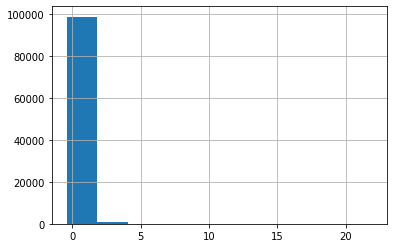

In [37]:
df1.월별_보험료별매출액.hist()

In [38]:
df1.월별_보험료별매출액.describe()

count    99788.000000
mean         0.214463
std          0.504894
min         -0.389183
25%          0.058156
50%          0.110782
75%          0.217552
max         21.872238
Name: 월별_보험료별매출액, dtype: float64

In [39]:
df1.월별_보험료별매출액.quantile(0.998)

4.981187146767152

In [40]:
id_s_is=df1.loc[df1.월별_보험료별매출액>4.98,:].회사ID.unique()
id_s_is

array([426180., 439585., 146654., 297874., 101711., 433492.,  40860.,
       102971., 260890., 567650., 382850., 157237.,  67616., 430504.,
       288613., 430507., 429453., 434348.])

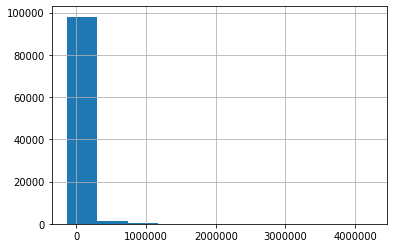

In [41]:
df1.월별직원별매출액.hist()

In [42]:
df1.월별직원별매출액.describe()

count    9.978800e+04
mean     4.951728e+04
std      1.231049e+05
min     -1.313696e+05
25%      1.182327e+04
50%      2.384811e+04
75%      4.887500e+04
max      4.232062e+06
Name: 월별직원별매출액, dtype: float64

In [60]:
sal_emp=df1['월별직원별매출액'].quantile(0.997)

In [61]:
id_s_epl=df1.loc[df1['월별직원별매출액']>round(sal_emp,2),:].회사ID.unique()
id_s_epl

array([426180., 294649., 439585., 146654., 297874., 101711., 430504.,
       433492., 432911., 428817.,  40860., 102971., 260890., 567650.,
       382850., 433756.,  67616., 288613., 430507., 434348.])

In [45]:
df1.월별_직원별보험료.describe()

count     99788.000000
mean     222542.478314
std       64355.289384
min       26100.000000
25%      176628.571429
50%      223196.666667
75%      266722.500000
max      479821.250000
Name: 월별_직원별보험료, dtype: float64

In [62]:
ins_emp=df1.월별_직원별보험료.quantile(0.997)

In [63]:
id_epl_is=df1.loc[df1['월별_직원별보험료']>round(ins_emp,2),:].회사ID.unique()
id_epl_is

array([4.203040e+05, 3.312354e+06, 2.282930e+05, 1.888280e+05,
       9.500000e+01, 3.370730e+05, 2.833800e+05, 2.523630e+05,
       1.268310e+05, 1.475460e+05, 1.132630e+05, 4.165070e+05,
       4.424390e+05, 2.917100e+04, 4.413300e+05, 6.300000e+01,
       2.934020e+05, 2.946490e+05, 3.811800e+05, 4.436980e+05,
       3.891450e+05, 1.973220e+05, 2.316250e+05, 4.034620e+05,
       4.205730e+05, 4.200080e+05, 2.970770e+05, 6.015400e+04,
       2.274150e+05, 8.161900e+04, 5.452000e+03, 2.830210e+05,
       1.463810e+05, 4.225000e+05, 4.199980e+05, 1.394800e+04,
       2.020770e+05, 4.201650e+05, 4.337560e+05, 2.274140e+05,
       5.579760e+05, 1.063460e+05, 1.153890e+05, 3.402900e+04,
       3.274050e+05, 2.392830e+05, 5.196900e+04, 2.842000e+03,
       1.965490e+05, 3.069400e+04, 6.301900e+05, 3.947490e+05,
       2.909100e+04])

In [64]:
id_s_epl #직원별 매출액

array([426180., 294649., 439585., 146654., 297874., 101711., 430504.,
       433492., 432911., 428817.,  40860., 102971., 260890., 567650.,
       382850., 433756.,  67616., 288613., 430507., 434348.])

In [65]:
id_s_is #보험료별 매출액

array([426180., 439585., 146654., 297874., 101711., 433492.,  40860.,
       102971., 260890., 567650., 382850., 157237.,  67616., 430504.,
       288613., 430507., 429453., 434348.])

In [66]:
list1=[]
for i in id_s_epl:
    if i in id_s_is:
        list1.append(i)

list1

[426180.0,
 439585.0,
 146654.0,
 297874.0,
 101711.0,
 430504.0,
 433492.0,
 40860.0,
 102971.0,
 260890.0,
 567650.0,
 382850.0,
 67616.0,
 288613.0,
 430507.0,
 434348.0]

In [67]:
len(list1)
# 14개 기업을 직원별 보험료별 매출액으로 이상값으로 판단함

16

In [68]:
# 직원별 보험료로 고려한 상위 그룹은 매출액과 관련된 지표의 상위그룹과 곂치는 회사가 없음
list_fin=[]
for i in list1:
    if i in id_epl_is:
        list_fin.append(i)

list_fin

[]

In [69]:
id_epl_is

array([4.203040e+05, 3.312354e+06, 2.282930e+05, 1.888280e+05,
       9.500000e+01, 3.370730e+05, 2.833800e+05, 2.523630e+05,
       1.268310e+05, 1.475460e+05, 1.132630e+05, 4.165070e+05,
       4.424390e+05, 2.917100e+04, 4.413300e+05, 6.300000e+01,
       2.934020e+05, 2.946490e+05, 3.811800e+05, 4.436980e+05,
       3.891450e+05, 1.973220e+05, 2.316250e+05, 4.034620e+05,
       4.205730e+05, 4.200080e+05, 2.970770e+05, 6.015400e+04,
       2.274150e+05, 8.161900e+04, 5.452000e+03, 2.830210e+05,
       1.463810e+05, 4.225000e+05, 4.199980e+05, 1.394800e+04,
       2.020770e+05, 4.201650e+05, 4.337560e+05, 2.274140e+05,
       5.579760e+05, 1.063460e+05, 1.153890e+05, 3.402900e+04,
       3.274050e+05, 2.392830e+05, 5.196900e+04, 2.842000e+03,
       1.965490e+05, 3.069400e+04, 6.301900e+05, 3.947490e+05,
       2.909100e+04])

In [70]:
list1

[426180.0,
 439585.0,
 146654.0,
 297874.0,
 101711.0,
 430504.0,
 433492.0,
 40860.0,
 102971.0,
 260890.0,
 567650.0,
 382850.0,
 67616.0,
 288613.0,
 430507.0,
 434348.0]

In [71]:
list_fin=[]
for i in list1:
    if i in id_anomaly:
        list_fin.append(i)
list_fin
# isoforest로 구한 이상값에 해당하는 회사들과 직원별, 보험료별 매출액의 상위기업들 중 다음 기업들이 일치함
# 즉, 상위 0.2%에 해당하는 직원별, 보험료별 매출액에 해당하는 기업들이 isoforest를 기반으로한 이상값탐색에서의 이상값과 일치하는 기업으로
# 이들을 유니콘 기업으로 파악함

[146654.0, 297874.0, 433492.0]

In [79]:
unic_comp=df1.loc[df1.회사ID.isin(list_fin),:]
unic_comp=unic_comp.iloc[:,:-1]

In [73]:
u_f=unic_comp.회사ID.unique()
u_f

array([146654., 297874., 433492.])

In [74]:
len(u_f)

3

In [80]:
unic_comp.describe()

,회사ID,연매출액,year,month,월별_연금보험료,월별_직원수,월별_매출액,day,월별_직원별보험료,월별직원별매출액,월별_보험료별매출액
count,102.000000,1.020000e+02,102.000000,102.000000,1.020000e+02,102.000000,1.020000e+02,102.0,102.000000,1.020000e+02,102.000000
mean,276106.431373,6.961504e+08,2016.764706,6.794118,6.659041e+06,24.901961,5.801253e+07,1.0,269054.033278,2.281153e+06,9.193906
std,113400.739112,4.459627e+08,0.880779,3.569226,3.444825e+06,13.490378,3.716355e+07,0.0,56710.197654,8.327415e+05,4.562712
min,146654.000000,4.008298e+07,2015.000000,1.000000,6.813800e+05,3.000000,3.340248e+06,1.0,195849.375000,5.567081e+05,1.890971
25%,146654.000000,2.683306e+08,2016.000000,4.000000,2.856305e+06,10.500000,2.236088e+07,1.0,218405.365854,1.929423e+06,5.839029
50%,297874.000000,6.517537e+08,2017.000000,7.000000,8.741750e+06,27.000000,5.431281e+07,1.0,246817.566783,2.213475e+06,8.932388
75%,399587.500000,9.839046e+08,2017.000000,10.000000,8.940680e+06,33.000000,8.199205e+07,1.0,330936.296296,2.664933e+06,12.603991
max,433492.000000,1.501349e+09,2018.000000,12.000000,1.042306e+07,45.000000,1.251124e+08,1.0,364313.333333,4.232062e+06,18.633049


In [101]:
l_lab=[]
for i in range(df1.shape[0]):
    if df1.회사ID[i] in u_f:
        l_lab.append('uni')
    else:
        l_lab.append('normal')

l_lab        

['normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',

In [107]:
len(l_lab)

99801

In [109]:
pd.Series(l_lab).shape

(99801,)

In [105]:
df1=pd.concat([df1,pd.Series(l_lab)],axis=1)
col_fin=df1.columns.values
col_fin[-1]='label'

In [110]:
df1

,회사ID,연매출액,year,month,월별_연금보험료,월별_직원수,월별_매출액,day,date,월별_직원별보험료,월별직원별매출액,월별_보험료별매출액,anomaly,label
0,233757.0,41688077.0,2018.0,7.0,8912380.0,36.0,3.474006e+06,1.0,2018-07-01,247566.111111,96500.178241,0.389796,1.0,normal
1,123464.0,1760695.0,2018.0,3.0,942380.0,5.0,1.467246e+05,1.0,2018-03-01,188476.000000,29344.916667,0.155696,1.0,normal
2,342124.0,3221341.0,2018.0,7.0,781180.0,4.0,2.684451e+05,1.0,2018-07-01,195295.000000,67111.270833,0.343640,1.0,normal
3,386420.0,4815584.0,2015.0,11.0,3795900.0,14.0,4.012987e+05,1.0,2015-11-01,271135.714286,28664.190476,0.105719,1.0,normal
4,129243.0,9799736.0,2018.0,10.0,40724680.0,151.0,8.166447e+05,1.0,2018-10-01,269699.867550,5408.242826,0.020053,1.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99796,171439.0,4630622.0,2017.0,2.0,2402740.0,11.0,3.858852e+05,1.0,2017-02-01,218430.909091,35080.469697,0.160602,NaN,normal
99797,239388.0,1045021.0,2018.0,10.0,1428800.0,9.0,8.708508e+04,1.0,2018-10-01,158755.555556,9676.120370,0.060950,NaN,normal
99798,272304.0,181898.0,2018.0,3.0,392560.0,4.0,1.515817e+04,1.0,2018-03-01,98140.000000,3789.541667,0.038614,NaN,normal
99799,362194.0,2100218.0,2018.0,12.0,874780.0,3.0,1.750182e+05,1.0,2018-12-01,291593.333333,58339.388889,0.200071,NaN,normal


In [114]:
df1.iloc[:,8:12].describe()

,월별_직원별보험료,월별직원별매출액,월별_보험료별매출액
count,99788.000000,9.978800e+04,99788.000000
mean,222542.478314,4.951728e+04,0.214463
std,64355.289384,1.231049e+05,0.504894
min,26100.000000,-1.313696e+05,-0.389183
25%,176628.571429,1.182327e+04,0.058156
50%,223196.666667,2.384811e+04,0.110782
75%,266722.500000,4.887500e+04,0.217552
max,479821.250000,4.232062e+06,21.872238


### cb인사이트와 사람인 기준 유니콘데이터의 매출액 성장률을 추가변수를 저장한 데이터프레임에 다시 적용함

In [150]:
df_demo=df1.loc[df1.회사ID.isin(f_id_demo),:]

### 아웃라이어와 원 데이터의 추가변수 상위값 기준으로 정한 유니콘 기업의 하위 10%에서 상위 90%까지에 해당하는
### 직원별 매출액,보험료별 매출액에 해당하는 데이터들을 위 df_demo에서 구함

In [151]:
df_demo2=df_demo.loc[df_demo.월별_보험료별매출액 > unic_comp.월별_보험료별매출액.quantile(0.10)].loc[df_demo.월별_보험료별매출액 
                                                                    < unic_comp.월별_보험료별매출액.quantile(0.90)]

In [152]:
df_demo3=df_demo2.loc[df_demo2.월별직원별매출액 > unic_comp.월별직원별매출액.quantile(0.10)].loc[df_demo2.월별직원별매출액 
                                                                  < unic_comp.월별직원별매출액.quantile(0.90)]

### 최종적을 다음의 6개의 기업이 유니콘 기업에 해당함

In [153]:
df_demo3.회사ID.unique()

array([439585., 146654., 297874., 382850., 430504., 433492.])

## 이하는 개인적 연습용 작업입니다.

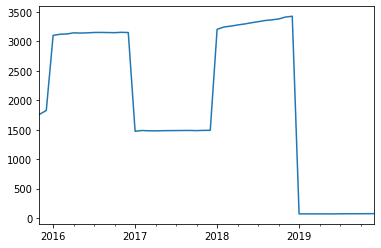

In [13]:
df1.date.value_counts().sort_index().plot()

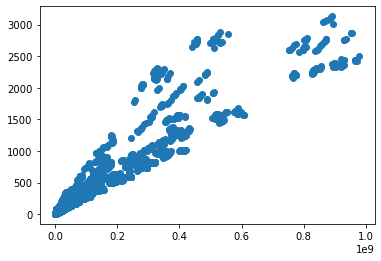

In [83]:
# 상식처럼 연금보험료와 직원수는 양의 상관관계를 보임
plt.scatter(df1.월별_연금보험료,df1.월별_직원수)

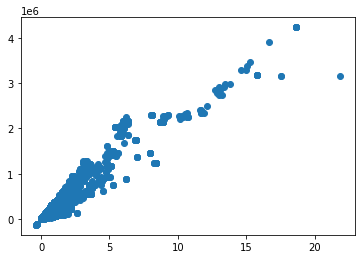

In [84]:
plt.scatter(df1.월별_보험료별매출액,df1.월별직원별매출액)

<AxesSubplot:>

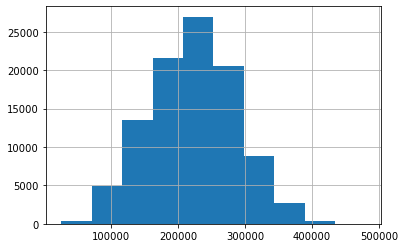

In [119]:
df1.월별_직원별보험료.hist()

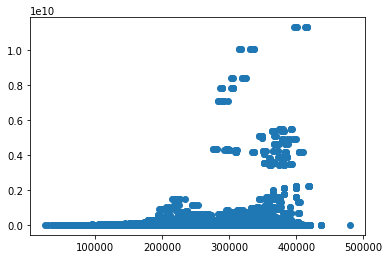

In [147]:
# 직원들의 임금과 연매출액에는 상관관계가 눈에 보이지 않음
plt.scatter(df1.월별_직원별보험료,df1.연매출액)

In [127]:
high_sal_df=df1.loc[df1.월별_직원별보험료 > 300000,:]
high_sal_df.회사ID.unique().shape
# 월별직원별 보험료가 300000넘는 기업은 전체 50000개중 885개에 해당함

(885,)

In [130]:
high_sal_df

,회사ID,연매출액,year,month,월별_연금보험료,월별_직원수,day,date,월별_직원별보험료
33039,63,11328779396,2018,1,403119840,1006,1,2018-01-01,400715.546720
74251,63,11328779396,2018,2,406770960,1018,1,2018-02-01,399578.546169
80947,63,11328779396,2018,3,404826240,1013,1,2018-03-01,399631.036525
80770,63,11328779396,2018,4,404211800,1012,1,2018-04-01,399418.774704
28110,63,11328779396,2018,5,400339640,1002,1,2018-05-01,399540.558882
...,...,...,...,...,...,...,...,...,...
47412,3312354,1451563,2019,8,1312200,3,1,2019-08-01,437400.000000
244,3312354,1451563,2019,9,1312200,3,1,2019-09-01,437400.000000
38757,3312354,1451563,2019,10,1312200,3,1,2019-10-01,437400.000000
49019,3312354,1451563,2019,11,1312200,3,1,2019-11-01,437400.000000


<AxesSubplot:>

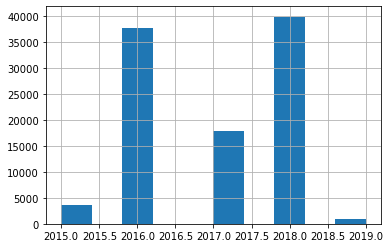

In [110]:
# 년도별 데이터 히스토그램 : 2016년과 2018년에 제일 많음
df1.year.hist()

In [ ]:
# 국민연금보험료는 년도 별로 최고보험료와 최저보험료를 별도로 산정한다. 

In [57]:
# 연매출액을 카테고리화 하기
# 크기 조정( 1만원 단위)
df1['연매출액']=df1.연매출액/10000
df1['연매출액']

0        4168.8077
1         176.0695
2         322.1341
3         481.5584
4         979.9736
           ...    
99796     463.0622
99797     104.5021
99798      18.1898
99799     210.0218
99800      13.2900
Name: 연매출액, Length: 99801, dtype: float64

<AxesSubplot:>

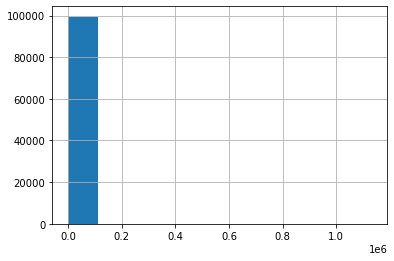

In [58]:
df1.연매출액.hist()

In [60]:
df1.연매출액.describe()

count    9.980100e+04
mean     3.053589e+03
std      3.016647e+04
min     -7.882176e+02
25%      1.409760e+02
50%      3.573585e+02
75%      9.582321e+02
max      1.132878e+06
Name: 연매출액, dtype: float64

<AxesSubplot:>

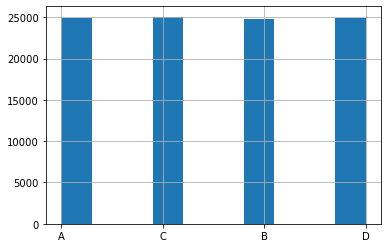

In [64]:
sales_cat=pd.cut(df1.연매출액,bins=[-8,141,358,959,np.inf],labels=['D','C','B','A'])
df1['cat']=sales_cat
df1.cat.hist()

In [31]:
id_counts=df1.회사ID.value_counts()
id_counts

250472     50
404192     50
128174     50
395238     50
135668     50
           ..
246979      1
105360      1
287627      1
573329      1
1983879     1
Name: 회사ID, Length: 5000, dtype: int64

<AxesSubplot:>

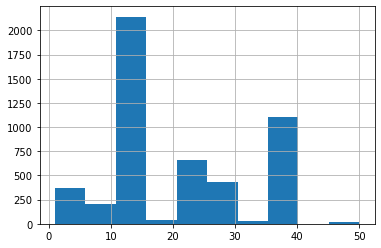

In [37]:
id_counts.hist()

In [35]:
df1.년도.unique()
# 년도는 15년부터 19년까지 존재함

array([2018, 2015, 2016, 2017, 2019], dtype=int64)

In [104]:
# 50건이상 있는 회사들의 id 출력
over_50_groups=id_counts[id_counts>49].index

In [106]:
# 5천개의 기업중에 50번나오는 기업이 14개임(측정시작부터 마지막까지의 데이터가 있는 기업)
# 4년*12개월+2개월 = 50개 맞음
len(over_50_groups)

14

In [107]:
df1.date.max()

Timestamp('2019-12-01 00:00:00')

In [108]:
df1.date.min()

Timestamp('2015-11-01 00:00:00')

In [36]:
id_counts[id_counts<49].index  

Int64Index([ 192812,  478922,  303882,  165163,  419945,  280967,  317331,
             240785,  441565,  249371,
            ...
             126413,  161535,  275473,  414585,  571871,  246979,  105360,
             287627,  573329, 1983879],
           dtype='int64', length=4986)

In [34]:
# 50건이상 데이터가 있는 회사들의 년도 출력
df1.loc[df1.회사ID==250472,'년도'].unique()
#df1.loc[df1.회사ID==404192,'년도'].unique()

array([2015, 2017, 2016, 2018, 2019], dtype=int64)